# **Diabetes 데이터와 Linear Regression**

당뇨병 진행도와 관련된 데이터를 이용해 당뇨병 진행을 예측하는 Linear Regression을 학습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

# 1. Data

1.1 Data Load

데이터는 sklearn.datasets의 load_diabetes 함수를 이용해 받을 수 있음

In [55]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()


당뇨병 데이터에서 사용되는 변수명은 feature_names 키 값으로 들어있음.\
변수명과 변수에 대한 설명은 다음과 같음

- age: 나이
- sex: 성별
- bmi: Body mass index
- bp: Average blood pressure
- 혈청에 대한 6가지 지표들
  -  S1, S2, S3, S4, S5, S6

In [3]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [58]:
data, target = diabetes['data'], diabetes['target'] # ??? data 와 target 무엇인지?

In [59]:
data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [60]:
target[0]

151.0

# 1.2 Data EDA

In [61]:
df = pd.DataFrame(data, columns=diabetes['feature_names'])

In [8]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


# 1.3 Data Split

sklearn.model_selection의 train_test_split함수 사용하여 데이터 나눔

In [27]:
train_test_split(
    *arrays, #???
    test_size = None,
    train_size = None,
    random_state = None,
    suffle = True,
    stratify = None,
)

NameError: ignored

- *array: 입력은 array로 이루어진 데이터를 받기
- test_size: test로 분할될 사이즈를 정함
- train_size: train 으로 분할될 사이즈를 정함
- random_state: 다음에도 같은 값을 받기 위해서 난수를 고정
- suffle: 데이터를 섞을지 말지 결정
- stratify: 데이터를 나눌때 정답의 분포 반영

In [28]:
from sklearn.model_selection import train_test_split
# train, test 각 data 및 target 나눔
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.3)

train 과 test를 7:3 비율로 나눔\
실제로 잘 나누어졌는지 확인

In [12]:
len(data), len(train_data), len(test_data)

(442, 309, 133)

In [13]:
print('train ratio: {:.2f}'.format(len(train_data)/len(data)))
print('test ratio: {:.2f}'.format(len(test_data)/len(data)))

train ratio: 0.70
test ratio: 0.30


# 2. Multivariate Regression

2.1 학습

In [14]:
from sklearn.linear_model import LinearRegression

multi_regressor = LinearRegression() #???
multi_regressor.fit(train_data, train_target) #???

LinearRegression()

# 2.2  회귀식 확인

In [15]:
multi_regressor.intercept_

147.71524417759434

In [16]:
multi_regressor.coef_

array([  15.28529701, -218.59128442,  545.19999487,  263.6592052 ,
       -582.66349612,  317.33684049,   48.53542723,  215.51374612,
        655.7965519 ,   64.04030953])

# 2.3 예측

In [17]:
multi_train_pred = multi_regressor.predict(train_data)
multi_test_pred = multi_regressor.predict(test_data)

# 2.4 평가

평가는 sklearn.metrics의 mean_squared_error을 이용. mean_squared_error 는 두 값의 차이의 제곱의 평균을 계산

In [18]:
from sklearn.metrics import mean_squared_error

multi_train_mae = mean_squared_error(multi_train_pred, train_target)
multi_test_mae = mean_squared_error(multi_test_pred, test_target)

In [19]:
print(f'Multi Regression Train MSE is {multi_train_mae:.4f}')
print(f'Multi Regression Test MSE is {multi_test_mae:.4f}')

Multi Regression Train MSE is 3034.2623
Multi Regression Test MSE is 2562.2750


# 3. Ridge Regression

3.1 학습

In [20]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge()
ridge_regressor.fit(train_data, train_target)

Ridge()

3.2 회귀식 확인

In [21]:
ridge_regressor.intercept_

147.74060119766182

In [22]:
# 500 or 300과 같은 큰 값이 나옴
multi_regressor.coef_


array([  15.28529701, -218.59128442,  545.19999487,  263.6592052 ,
       -582.66349612,  317.33684049,   48.53542723,  215.51374612,
        655.7965519 ,   64.04030953])

In [23]:
# 300을 넘지 않는 값이 나옴
ridge_regressor.coef_

array([  46.89201977,  -55.64009506,  270.71747699,  158.68867814,
         23.59440223,  -11.13019705, -130.05870493,  122.00237806,
        225.92117758,  107.08728777])

3.3 예측

In [30]:
ridge_train_pred = ridge_regressor.predict(train_data)
ridge_test_pred = ridge_regressor.predict(test_data)

3.4 평가

In [31]:
ridge_train_mae = mean_squared_error(ridge_train_pred, train_target)
ridge_test_mae = mean_squared_error(ridge_test_pred, test_target)


In [32]:
print(f'Ridge Regression Train MSE is {ridge_train_mae:.4f}')
print(f'Ridge Regression Test MSE is {ridge_test_mae:.4f}')

Ridge Regression Train MSE is 3427.9443
Ridge Regression Test MSE is 3498.3785


# 4. LASSO Regression

4.1 학습

In [33]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso()
lasso_regressor.fit(train_data, train_target)



Lasso()

4.2 회귀식 확인

In [34]:
lasso_regressor.intercept_

154.11772791777125

In [39]:
lasso_regressor.coef_ # 여러변수들 0이됨

array([  0.        ,   0.        , 318.24804461,  60.82040112,
         0.        ,   0.        ,  -0.        ,   0.        ,
       334.50178639,   0.        ])

In [40]:
np.array(diabetes['feature_names'])[lasso_regressor.coef_ != 0] # 0이 아닌 변수 선택

array(['bmi', 'bp', 's5'], dtype='<U3')

4.3 예측

In [42]:
lasso_train_pred = lasso_regressor.predict(train_data)
lasso_test_pred = lasso_regressor.predict(test_data)

4.4 평가

In [43]:
lasso_train_mae = mean_squared_error(lasso_train_pred, train_target)
lasso_test_mae = mean_squared_error(lasso_test_pred, test_target)

In [47]:
print(f'LASSO Regression Train MSE is {lasso_train_mae:.4f}')
print(f'LASSO Regeresion Test MSE is {lasso_test_mae:.4f}')

LASSO Regression Train MSE is 3729.7548
LASSO Regeresion Test MSE is 3829.1928


5. 마무리

5.1 평가

In [48]:
# Multi Regression 이 제일 예측을 잘함
print(f'Multi Regression Test MSE is {multi_test_mae:.4f}')
print(f'Ridge Regression Test MSE is {ridge_test_mae:.4f}')
print(f'LASSO Regression Test MSE is {lasso_test_mae:.4f}')

Multi Regression Test MSE is 2562.2750
Ridge Regression Test MSE is 3498.3785
LASSO Regression Test MSE is 3829.1928


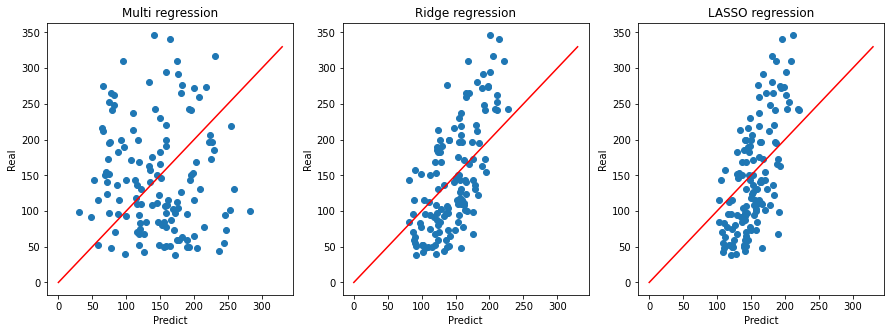

In [54]:
# 가로축 예측값, 새로축은 실제값 > 일직선상에 그려져 있으면 예측이 잘함
# Multi regression이 가장 일직선에 가까우므로 예측을 제일 잘함
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

pred = [
    ('Multi regression', multi_test_pred),
    ('Ridge regression', ridge_test_pred),
    ('LASSO regression', lasso_test_pred),
]

for idx, (name, test_pred) in enumerate(pred):
  ax = axes[idx]
  ax.scatter(test_pred, test_target)
  ax.plot(np.linspace(0, 330, 100), np.linspace(0, 330, 100), color = "red")
  ax.set_xlabel('Predict')
  ax.set_ylabel('Real')
  ax.set_title(name)